### Zadanie 1.  
1.1. Import  modułów  (należy  zaimportować  klasę  LinearRegression  z  biblioteki 
sklearn.linear_model).

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns

1.2. Otwarcie pliku z danymi. Należy zaimportować nazwy kolumn i stworzyć obiekt df. 

In [57]:
df = pd.read_csv('housing.csv', header=None, delim_whitespace=True)

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

df.columns = column_names

print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


C:\Users\DELL\AppData\Local\Temp\ipykernel_4316\4120265952.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('housing.csv', header=None, delim_whitespace=True)


1.3. Sprawdzenie podstawowych statystyk.

In [58]:
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

1.4. Sprawdzenie kompletności danych.

In [59]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


1.5. Czy typy danych są akceptowalne?

In [60]:
print(df.dtypes)

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


1.6. Należy stworzyć wykresy pudełkowe dla wszystkich kolumn.

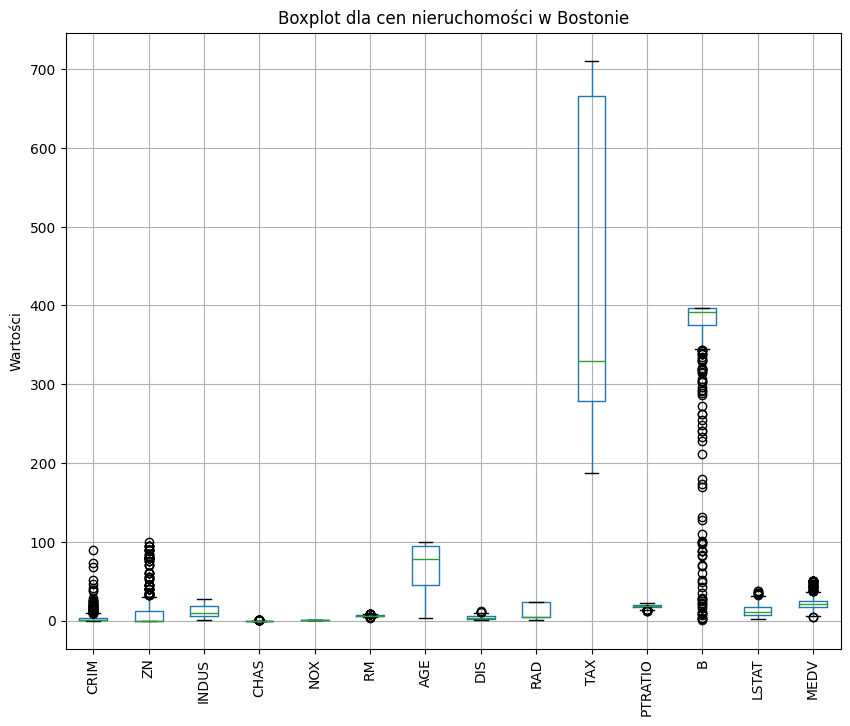

In [61]:
plt.figure(figsize=(10, 8))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot dla cen nieruchomości w Bostonie")
plt.ylabel("Wartości")
plt.show()

1.7. Korzystając z metody IQR, czyli rozstępu międzykwartylowego, należy wyznaczyć % 
wartości odstających dla każdej z kolumn. Dana wartość jest traktowana jako odstająca, gdy 
xi  <  Q1 - 1.5 · IQR (wartość za mała) lub xi > Q3 +1.5 · IQR (wartość za duża).

In [62]:
def calculate_outlier_percentage(dataframe):
    outlier_percentages = {}
    for column in dataframe.columns:
        Q1 = dataframe[column].quantile(0.25)
        Q3 = dataframe[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = dataframe[(dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)]
        
        outlier_percentage = len(outliers) / len(dataframe) * 100
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

outlier_percentages = calculate_outlier_percentage(df)

for column, percentage in outlier_percentages.items():
    print(f'{column}: {percentage:.2f}%')

CRIM: 13.04%
ZN: 13.44%
INDUS: 0.00%
CHAS: 6.92%
NOX: 0.00%
RM: 5.93%
AGE: 0.00%
DIS: 0.99%
RAD: 0.00%
TAX: 0.00%
PTRATIO: 2.96%
B: 15.22%
LSTAT: 1.38%
MEDV: 7.91%


1.8.  Należy  utworzyć  macierz  korelacji  dla  wszystkich  cech.  Następnie  należy  narysować 
wykres przedstawiający tę macierz (można skorzystać z sns.heatmap).

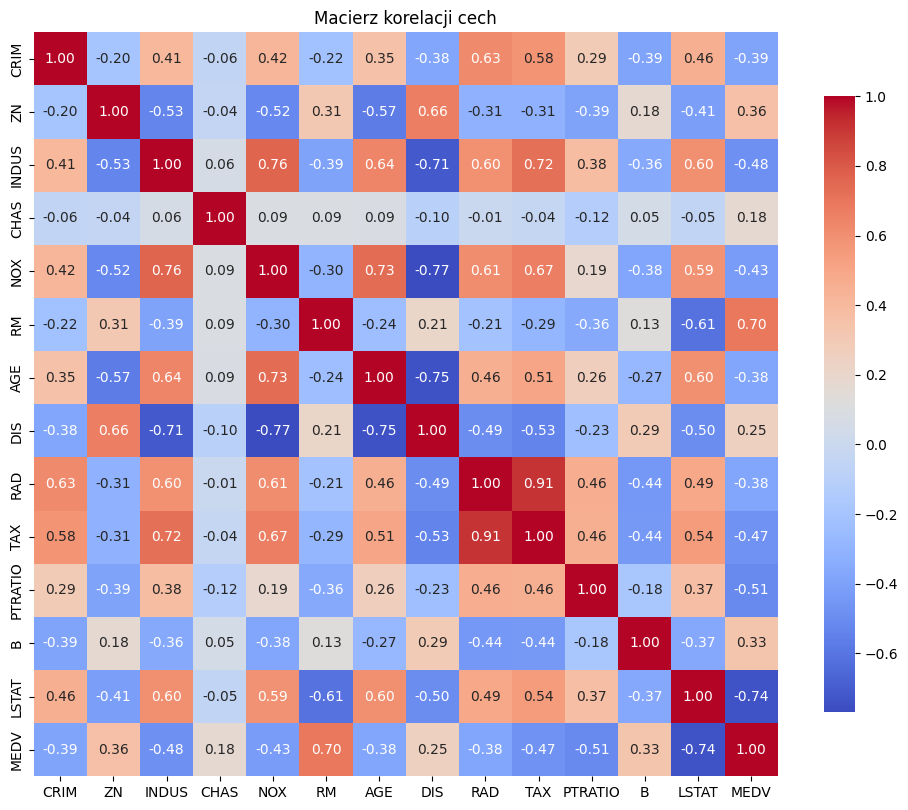

In [63]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Macierz korelacji cech")
plt.show()

1.9. Wykres pairplot dla wszystkich kolumn. 

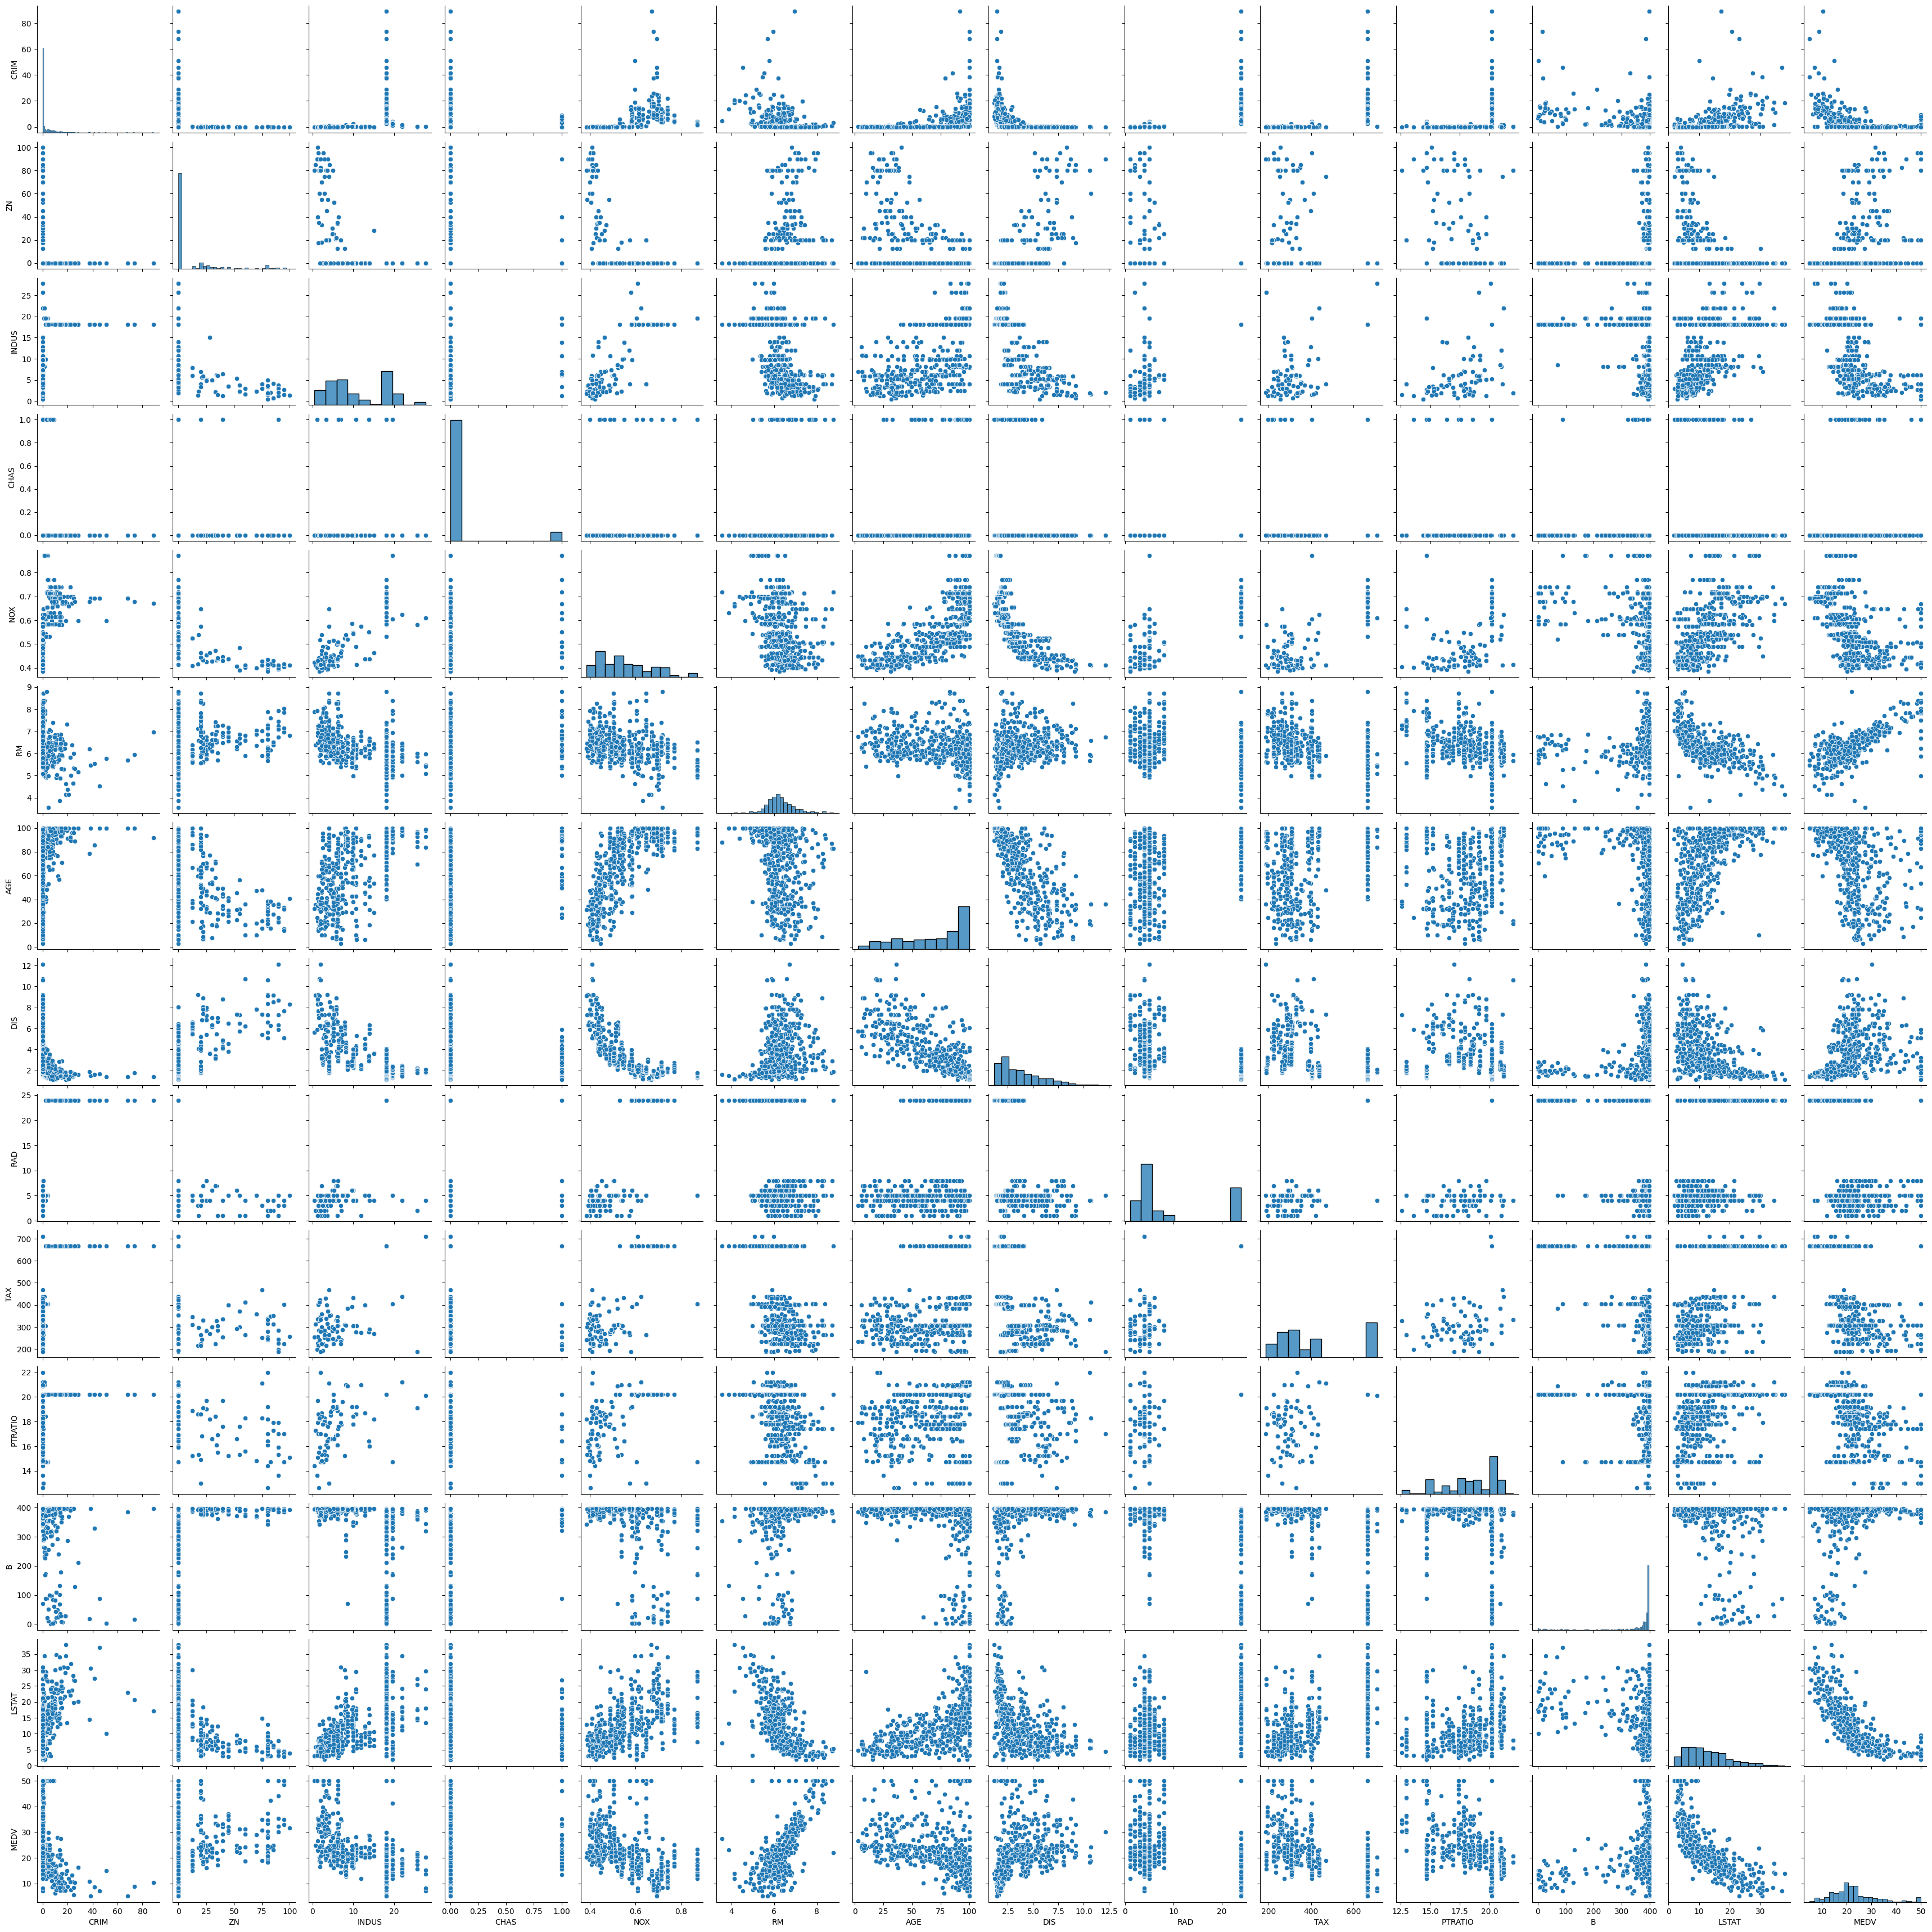

In [64]:
sns.pairplot(df)
plt.show()

1.10. Należy stworzyć obiekt df_selected, który będzie zawierać najbardziej skorelowane cechy 
o współczynniku korelacji <-0.5 oraz >0.5. Należy narysować wykres pairplot.

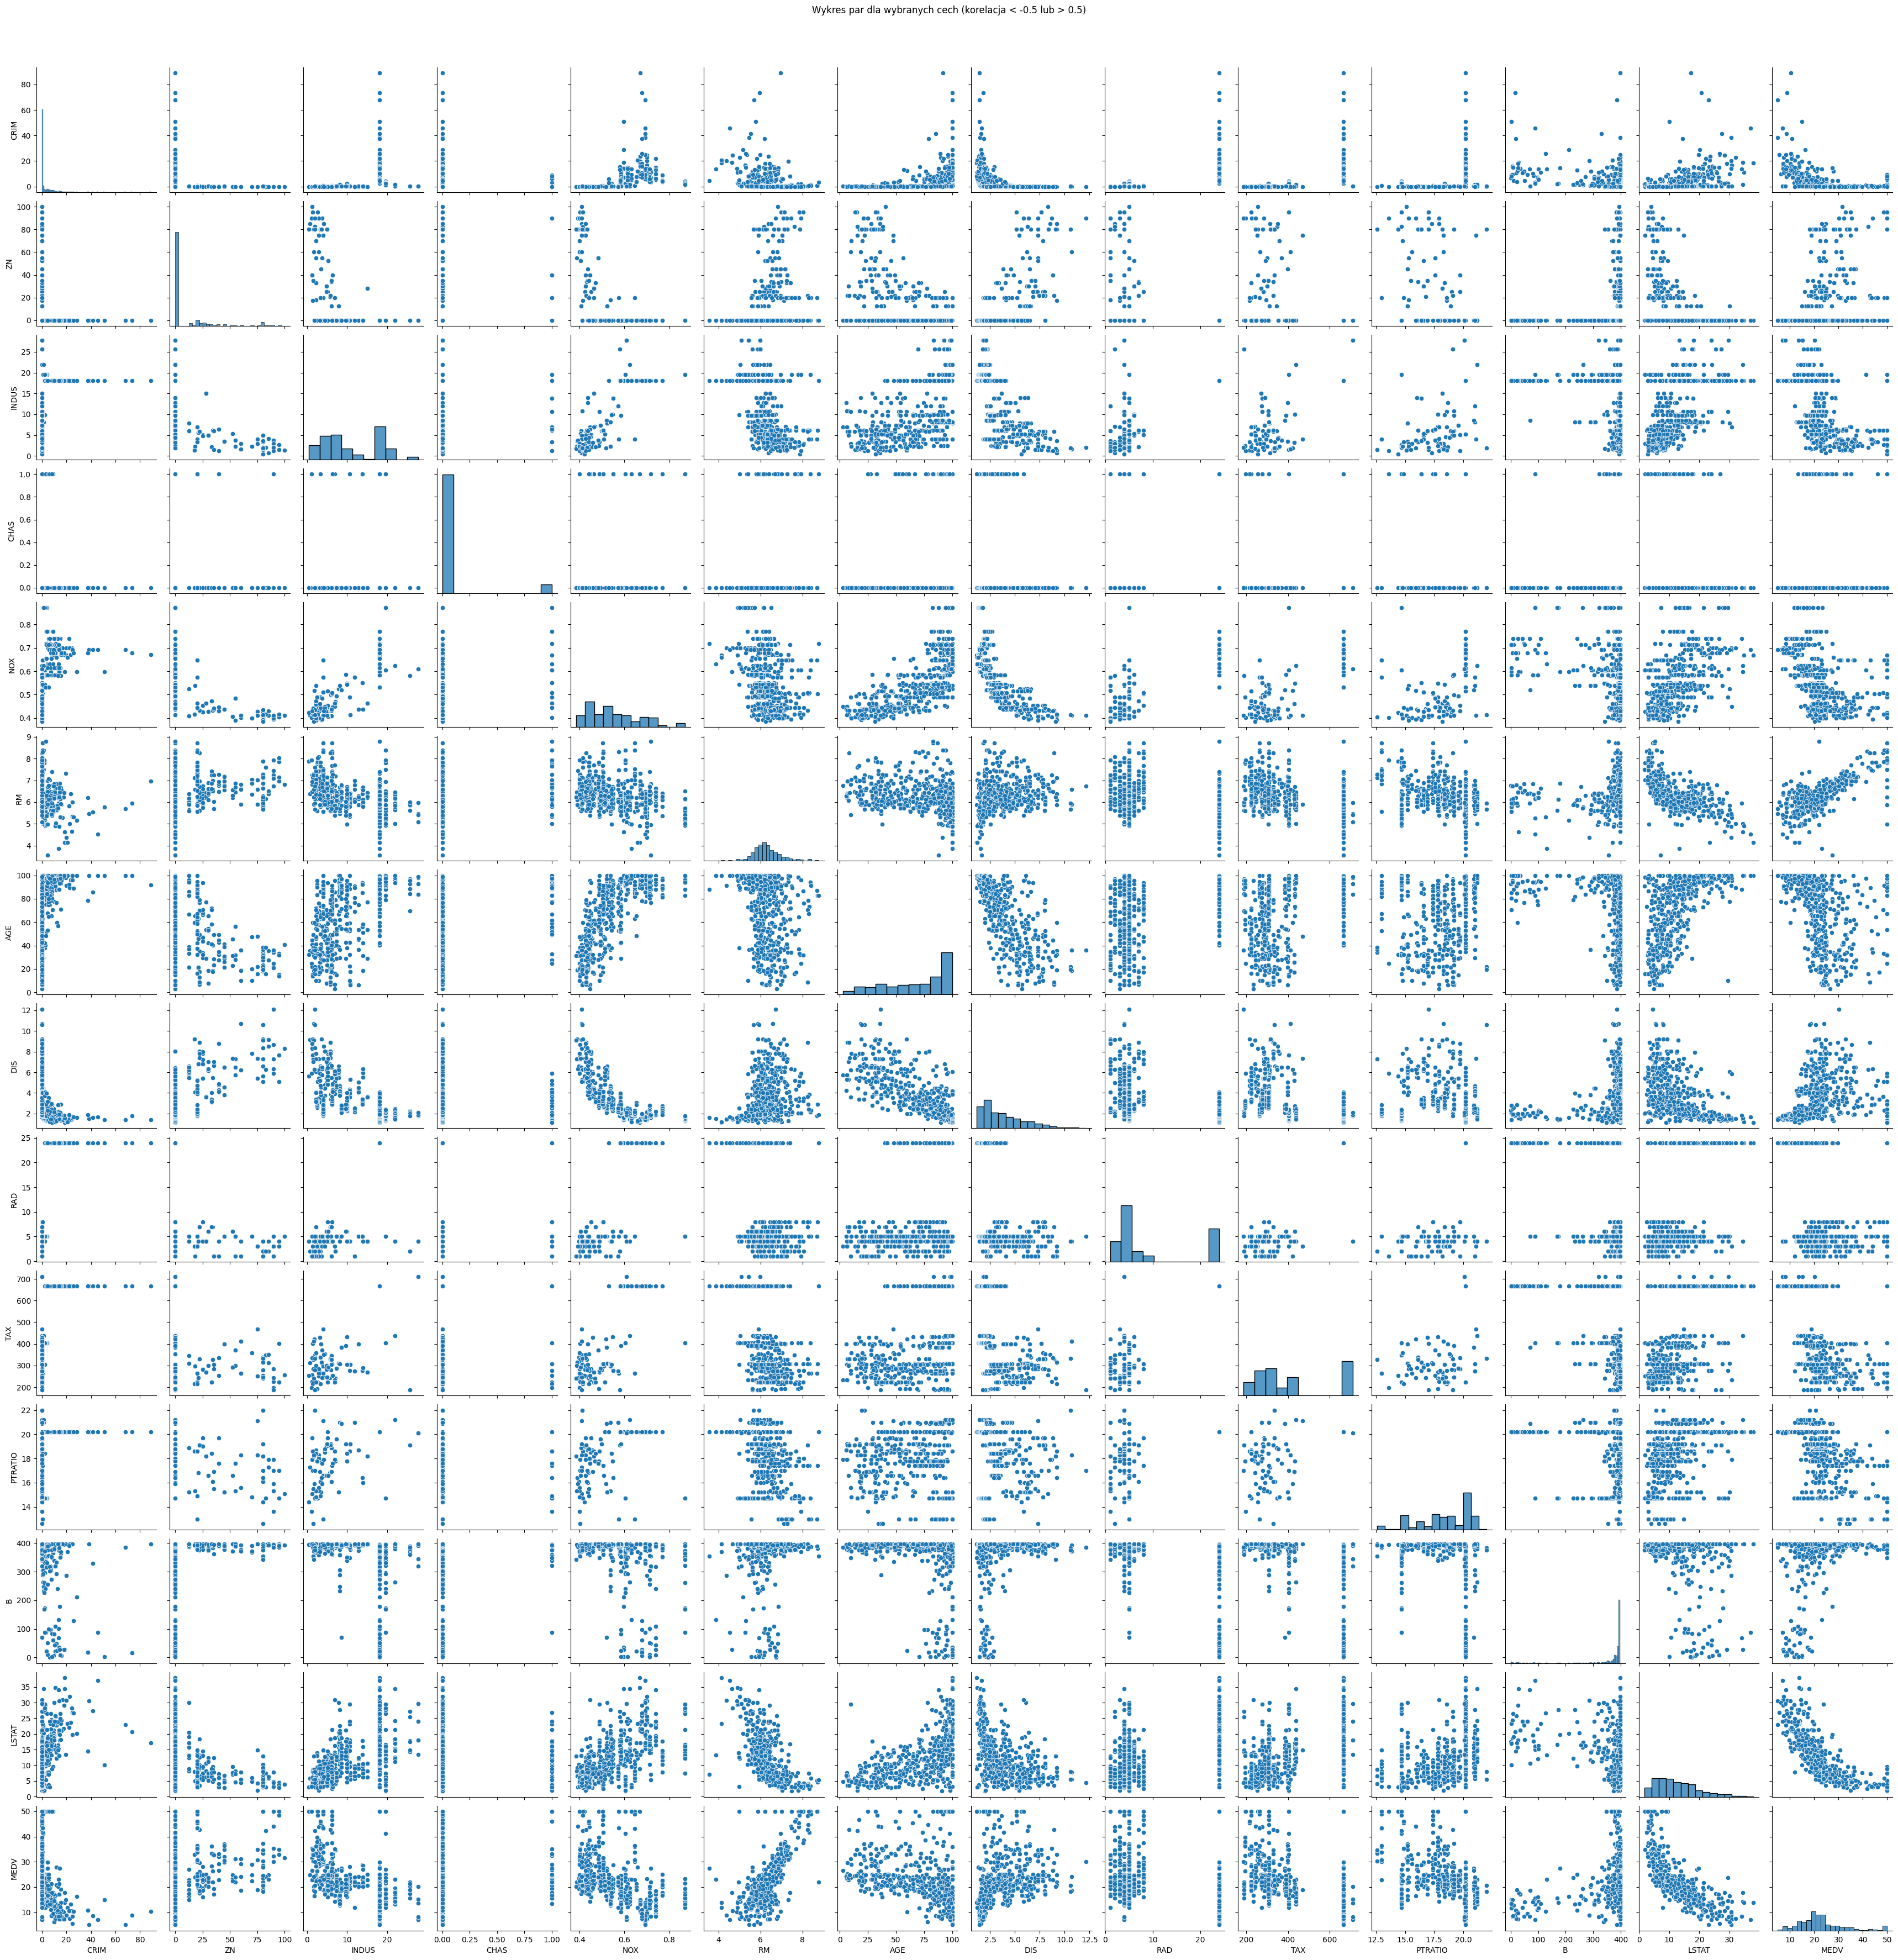

In [65]:
selected_columns = correlation_matrix.columns[
    (correlation_matrix.abs() > 0.5).any(axis=0)
]

df_selected = df[selected_columns]

sns.pairplot(df_selected)
plt.suptitle("Wykres par dla wybranych cech (korelacja < -0.5 lub > 0.5)", y=1.02)
plt.show()

1.11. Do zmiennej X należy zapisać wszystkie kolumny (13) z zestawu danych (macierz cech) 
oprócz kolumny MEDV (można skorzystać z metody drop z argumentem axis=1).

In [66]:
X = df.drop(columns=['MEDV'], axis=1)

print(X.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


1.12. Do zmiennej y należy zapisać dane z kolumny MEDV.

In [67]:
y = df['MEDV']

1.13. Do zmiennych X_train, X_test, y_train, y_test należy zapisać dane powstałe z podziału X 
i  y  na  dane  uczące  i  testowe  (z  biblioteki  sklearn.model_selection  należy  zaimportować 
train_test_split). Zbiór testowy ma stanowić 20% zbioru danych, a random_state = 101).

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (404, 13)
X_test shape: (102, 13)
y_train shape: (404,)
y_test shape: (102,)


1.14.  Należy  stworzyć  obiekt  regresji  liniowej  model. Dla  obiektu  model  należy  wywołać 
metodę fit(), która ma nauczyć model w jaki sposób odgadywać wartość nieruchomości w 
oparciu dane społeczno-gospodarcze na zbiorze treningowym. 
Wyniki  obliczeń  są  zapisywane  w  atrybutach  modelu.  W  Scikit-Learn  wszystkie 
parametry, których wartości zostały ustalone poprzez wywołanie fit, zawierają na końcu 
nazw symbol podkreślenia.  
Np. dla regresji liniowej pojedynczej zmiennej: 
model.coef_ - nachylenie,  
model.intercept_ - punkt przecięcia prostej dopasowanej do zbioru danych. 

In [69]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

1.15. Należy wyświetlić wartości współczynników dopasowania. Jak interpretować wartości 
poszczególnych współczynników?

In [70]:
coefficients = model.coef_
intercept = model.intercept_

coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
print(coeff_df)

print("Punkt przecięcia (intercept):", intercept)

    Feature  Coefficient
0      CRIM    -0.098991
1        ZN     0.042505
2     INDUS     0.016739
3      CHAS     3.064379
4       NOX   -15.646253
5        RM     4.018884
6       AGE    -0.000832
7       DIS    -1.446280
8       RAD     0.267827
9       TAX    -0.010473
10  PTRATIO    -0.888652
11        B     0.008253
12    LSTAT    -0.549367
Punkt przecięcia (intercept): 32.906130908637294


1.16. W zmiennej y_pred należy zapisać wynik predykcji dla X_test. 

In [71]:
y_pred = model.predict(X_test)

print("Przewidywane wartości dla zbioru testowego (y_pred):")
print(y_pred[:5])

Przewidywane wartości dla zbioru testowego (y_pred):
[40.38909533 27.88818526 16.33126585 17.34675932 30.91273758]


1.17. Należy wyświetlić wykres punktowy y_test vs y_pred. 

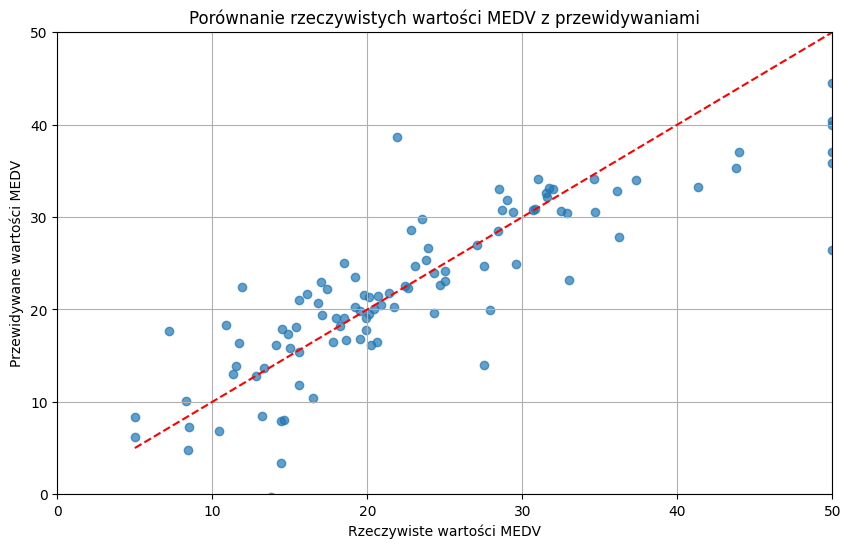

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Porównanie rzeczywistych wartości MEDV z przewidywaniami')
plt.xlabel('Rzeczywiste wartości MEDV')
plt.ylabel('Przewidywane wartości MEDV')
plt.xlim([0, 50])
plt.ylim([0, 50])
plt.grid()
plt.show()

1.18. Ewaluacja modelu, czyli należy wyznaczyć wartość MAE, MSE, RMSE, R2 (z biblioteki 
sklearn.metrics należy zaimportować odpowiednie wskaźniki wydajności). 

In [73]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Ewaluacja modelu:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

Ewaluacja modelu:
MAE: 4.00
MSE: 33.27
RMSE: 5.77
R²: 0.70


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.19. Należy zastosować regularyzacje (z biblioteki sklearn.linear_model należy zaimportować 
Ridge, Lasso, ElasticNet).  
1.19.1. Regresja grzbietowa (współczynnik regularyzacji, alpha = 0.5). Należy stworzyć 
obiekt  ridge.  Dla  obiektu  ridge  należy  wywołać  metodę  fit().  Należy  wyświetlić 
wartości  współczynników  dopasowania.  W  zmiennej  y_pred  należy  zapisać  wynik 
predykcji dla X_test. Należy przeprowadzić ewaluację modelu ridge jak w 1.18. 

In [74]:
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

print("Współczynniki regresji grzbietowej:")
print(ridge.coef_)

y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nEwaluacja modelu regresji grzbietowej:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")

Współczynniki regresji grzbietowej:
[-9.79174176e-02  4.31536763e-02 -2.23126264e-04  3.03379451e+00
 -1.11122248e+01  4.04715476e+00 -5.10395997e-03 -1.37586671e+00
  2.58361218e-01 -1.08329348e-02 -8.38753714e-01  8.49360315e-03
 -5.53909663e-01]

Ewaluacja modelu regresji grzbietowej:
MAE: 4.01
MSE: 33.60
RMSE: 5.80
R²: 0.70


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.19.2.  Regresja  metodą  lasso  (współczynnik  regularyzacji,  alpha  =  0.5).  Należy 
stworzyć obiekt lasso i dalej postępować jak w 1.19.1. 

In [75]:
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

print("Współczynniki regresji Lasso:")
print(lasso.coef_)

y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nEwaluacja modelu regresji Lasso:")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")

Współczynniki regresji Lasso:
[-0.07385044  0.04391038 -0.          0.         -0.          2.56297452
  0.00532411 -0.92003387  0.2498994  -0.01330698 -0.72102617  0.00856959
 -0.68793799]

Ewaluacja modelu regresji Lasso:
MAE: 4.14
MSE: 35.36
RMSE: 5.95
R²: 0.68


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.19.3. Regresja elastycznej siatki (współczynnik regularyzacji, alpha = 0.5, l1_ratio = 
0.5). Należy stworzyć obiekt elastic i dalej postępować jak w 1.19.1.

In [76]:
elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train, y_train)

print("Współczynniki regresji Elastic Net:")
print(elastic.coef_)

y_pred_elastic = elastic.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nEwaluacja modelu regresji Elastic Net:")
print(f"MAE: {mae_elastic:.2f}")
print(f"MSE: {mse_elastic:.2f}")
print(f"RMSE: {rmse_elastic:.2f}")
print(f"R²: {r2_elastic:.2f}")

Współczynniki regresji Elastic Net:
[-0.0828387   0.04892706 -0.01922987  0.         -0.          1.73110822
  0.01089852 -0.97365677  0.2866926  -0.01424991 -0.76800059  0.00805186
 -0.7446993 ]

Ewaluacja modelu regresji Elastic Net:
MAE: 4.18
MSE: 36.04
RMSE: 6.00
R²: 0.68


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


1.20.  Do  zmiennej  X_selected  należy  zapisać  kolumny  'RM',  'PTRATIO',  'LSTAT'  (na 
podstawie analizy z zadania 1.8.-1.10.), a do zmiennej y  należy zapisać dane z kolumny MEDV. 
Następnie należy wykonać kroki od 1.13 do 1.19.

In [77]:
X_selected = df[['RM', 'PTRATIO', 'LSTAT']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

print("Współczynniki regresji liniowej:")
print(model.coef_)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nEwaluacja modelu regresji liniowej:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

print("\nWspółczynniki regresji Ridge:")
print(ridge.coef_)

y_pred_ridge = ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nEwaluacja modelu regresji Ridge:")
print(f"MAE: {mae_ridge:.2f}")
print(f"MSE: {mse_ridge:.2f}")
print(f"RMSE: {rmse_ridge:.2f}")
print(f"R²: {r2_ridge:.2f}")

lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

print("\nWspółczynniki regresji Lasso:")
print(lasso.coef_)

y_pred_lasso = lasso.predict(X_test)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\nEwaluacja modelu regresji Lasso:")
print(f"MAE: {mae_lasso:.2f}")
print(f"MSE: {mse_lasso:.2f}")
print(f"RMSE: {rmse_lasso:.2f}")
print(f"R²: {r2_lasso:.2f}")

elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train, y_train)

print("\nWspółczynniki regresji Elastic Net:")
print(elastic.coef_)

y_pred_elastic = elastic.predict(X_test)

mae_elastic = mean_absolute_error(y_test, y_pred_elastic)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
rmse_elastic = mean_squared_error(y_test, y_pred_elastic, squared=False)
r2_elastic = r2_score(y_test, y_pred_elastic)

print("\nEwaluacja modelu regresji Elastic Net:")
print(f"MAE: {mae_elastic:.2f}")
print(f"MSE: {mse_elastic:.2f}")
print(f"RMSE: {rmse_elastic:.2f}")
print(f"R²: {r2_elastic:.2f}")

Współczynniki regresji liniowej:
[ 4.69352307 -0.8690665  -0.56555801]

Ewaluacja modelu regresji liniowej:
MAE: 4.29
MSE: 39.52
RMSE: 6.29
R²: 0.65

Współczynniki regresji Ridge:
[ 4.67336013 -0.86963862 -0.56666171]

Ewaluacja modelu regresji Ridge:
MAE: 4.29
MSE: 39.52
RMSE: 6.29
R²: 0.65

Współczynniki regresji Lasso:
[ 3.09328513 -0.82141781 -0.65559482]

Ewaluacja modelu regresji Lasso:
MAE: 4.37
MSE: 40.03
RMSE: 6.33
R²: 0.64

Współczynniki regresji Elastic Net:
[ 2.10117737 -0.86827762 -0.7097906 ]


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: '


Ewaluacja modelu regresji Elastic Net:
MAE: 4.44
MSE: 41.06
RMSE: 6.41
R²: 0.63


### Zadanie 2.  
2.1. Z biblioteki sklearn.preprocessing należy zaimportować StandardScaler. Standaryzacja 
danych w zadaniu 2 ma być przeprowadzona na wszystkich kolumnach z pierwotnego zestawu 
danych (z zadania 1.11).

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)


X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled_df.head())


       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  


2.2. Należy stworzyć obiekt scaler, który będzie służył do standaryzacji danych: 

In [79]:
scaler = StandardScaler()

2.3. Następnie dla obiektu scaler należy wywołać metodę fit, która dopasuje model do danych 
treningowych. WAŻNE !!! Trenowanie odbywa się na tylko na macierzy cech (X_train): 

In [80]:
scaler.fit(X_train)

StandardScaler()

2.4. Następnie oryginalny treningowy zestaw cech zostanie przekształcony przy użyciu metody 
transform(): 

In [81]:
scaled_X_train = scaler.transform(X_train)

2.5. Należy również przekształcić testowy zestaw cech (X_test) za pomocą transform: 

In [82]:
scaled_X_test = scaler.transform(X_test)

2.6. Stworzenie i trenowanie modelu: 

In [83]:
model = LinearRegression()

model.fit(scaled_X_train, y_train)

LinearRegression()

2.7. Należy wyświetlić wartości współczynników dopasowania.

In [84]:
print("Współczynniki regresji:", model.coef_)

print("Punkt przecięcia (intercept):", model.intercept_)

Współczynniki regresji: [ 3.15775107 -1.86589562 -3.86607522]
Punkt przecięcia (intercept): 22.336881188118813


2.8. W zmiennej y_pred należy zapisać wynik predykcji dla scaled_X_test.

In [85]:
y_pred = model.predict(scaled_X_test)

2.9. Wykres punktowy scaled_X_test vs y_test z naniesioną krzywą regresji.

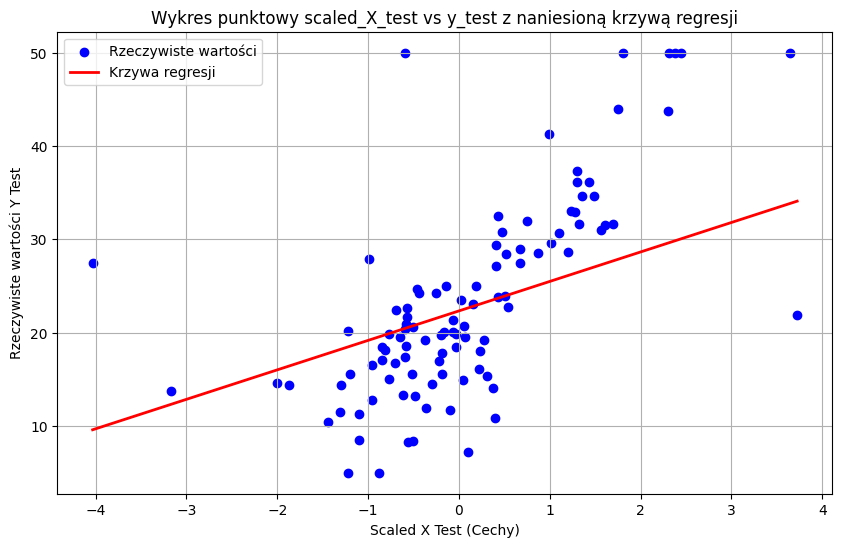

In [88]:
plt.figure(figsize=(10, 6))

plt.scatter(scaled_X_test[:, 0], y_test, color='blue', label='Rzeczywiste wartości')  

predictions = model.predict(scaled_X_test)

x_values = np.linspace(scaled_X_test[:, 0].min(), scaled_X_test[:, 0].max(), 100)
y_values = model.intercept_ + model.coef_[0] * x_values  

plt.plot(x_values, y_values, color='red', label='Krzywa regresji', linewidth=2)

plt.xlabel('Scaled X Test (Cechy)')
plt.ylabel('Rzeczywiste wartości Y Test')
plt.title('Wykres punktowy scaled_X_test vs y_test z naniesioną krzywą regresji')
plt.legend()
plt.grid()

plt.show()

2.10.  Ewaluacja  modelu.  Jaka  jest  różnica  między  przewidywanymi  etykietami  dla  zbioru 
testowego, a rzeczywistymi wartościami? Czy uzyskane wyniki różnią się w porównaniu do 
danych nieprzekształconych?

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 4.293031599041228
Mean Squared Error (MSE): 39.52431488911285
Root Mean Squared Error (RMSE): 6.286836636108246
R-squared (R²): 0.647705737459886


Po standaryzacji danych model osiągnął następujące wyniki: Mean Absolute Error (MAE): 4.29, Mean Squared Error (MSE): 39.52, Root Mean Squared Error (RMSE): 6.29, oraz R-squared (R²): 0.65. Oznacza to, że przeciętna różnica między przewidywanymi a rzeczywistymi cenami nieruchomości wynosi około 4.29 tysiąca dolarów, a model wyjaśnia około 65% zmienności danych.

W porównaniu do wyników dla danych nieprzekształconych, standaryzacja nie przyniosła znaczącej poprawy. Otrzymane wyniki wskazują, że model dobrze radzi sobie z przewidywaniem cen, ale niektóre większe błędy nadal występują, co sugeruje możliwość dalszej poprawy, np. przez zastosowanie bardziej zaawansowanych technik regularyzacji.

2.11. Należy zastosować regularyzację jak w zadaniu 1.19.

In [33]:
ridge = Ridge(alpha=0.5)
ridge.fit(scaled_X_train, y_train)

print("Ridge Regression Coefficients:")
print(ridge.coef_)

y_pred_ridge = ridge.predict(scaled_X_test)

ridge_mae = mean_absolute_error(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_rmse = ridge_mse ** 0.5
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MAE: {ridge_mae}, MSE: {ridge_mse}, RMSE: {ridge_rmse}, R²: {ridge_r2}")

lasso = Lasso(alpha=0.5)
lasso.fit(scaled_X_train, y_train)

print("Lasso Regression Coefficients:")
print(lasso.coef_)

y_pred_lasso = lasso.predict(scaled_X_test)

lasso_mae = mean_absolute_error(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_rmse = lasso_mse ** 0.5
lasso_r2 = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MAE: {lasso_mae}, MSE: {lasso_mse}, RMSE: {lasso_rmse}, R²: {lasso_r2}")

elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(scaled_X_train, y_train)

print("ElasticNet Regression Coefficients:")
print(elastic.coef_)

y_pred_elastic = elastic.predict(scaled_X_test)

elastic_mae = mean_absolute_error(y_test, y_pred_elastic)
elastic_mse = mean_squared_error(y_test, y_pred_elastic)
elastic_rmse = elastic_mse ** 0.5
elastic_r2 = r2_score(y_test, y_pred_elastic)

print(f"ElasticNet Regression - MAE: {elastic_mae}, MSE: {elastic_mse}, RMSE: {elastic_rmse}, R²: {elastic_r2}")


Ridge Regression Coefficients:
[ 3.15616977 -1.86567735 -3.86233433]
Ridge Regression - MAE: 4.2928242134378465, MSE: 39.52446233687912, RMSE: 6.2868483628030285, R²: 0.6477044232055535
Lasso Regression Coefficients:
[ 2.90028536 -1.54480418 -3.65203441]
Lasso Regression - MAE: 4.3646379266597295, MSE: 40.26284129223512, RMSE: 6.345300725122106, R²: 0.6411229892127803
ElasticNet Regression Coefficients:
[ 2.72144764 -1.6424067  -3.17565368]
ElasticNet Regression - MAE: 4.437728277871138, MSE: 41.43186074375107, RMSE: 6.436758558758521, R²: 0.6307031034608757


2.12.  Zbudować  modele  regresji  liniowej,  grzbietowej,  lasso  i  elastycznej  siatki  dla 
zeskalowanych wybranych cech: RM, PTRATIO, LSTAT.

In [34]:
X_selected = df[['RM', 'PTRATIO', 'LSTAT']]
y_selected = df['MEDV']

scaler = StandardScaler()
scaled_X_selected = scaler.fit_transform(X_selected)

X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(
    scaled_X_selected, y_selected, test_size=0.2, random_state=101
)

linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train_selected)


y_pred_linear = linear_model.predict(X_test_selected)
linear_mae = mean_absolute_error(y_test_selected, y_pred_linear)
linear_mse = mean_squared_error(y_test_selected, y_pred_linear)
linear_rmse = linear_mse ** 0.5
linear_r2 = r2_score(y_test_selected, y_pred_linear)

print("Linear Regression - MAE:", linear_mae, "MSE:", linear_mse, "RMSE:", linear_rmse, "R²:", linear_r2)

ridge = Ridge(alpha=0.5)
ridge.fit(X_train_selected, y_train_selected)

y_pred_ridge = ridge.predict(X_test_selected)
ridge_mae = mean_absolute_error(y_test_selected, y_pred_ridge)
ridge_mse = mean_squared_error(y_test_selected, y_pred_ridge)
ridge_rmse = ridge_mse ** 0.5
ridge_r2 = r2_score(y_test_selected, y_pred_ridge)

print("Ridge Regression - MAE:", ridge_mae, "MSE:", ridge_mse, "RMSE:", ridge_rmse, "R²:", ridge_r2)

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_selected, y_train_selected)

y_pred_lasso = lasso.predict(X_test_selected)
lasso_mae = mean_absolute_error(y_test_selected, y_pred_lasso)
lasso_mse = mean_squared_error(y_test_selected, y_pred_lasso)
lasso_rmse = lasso_mse ** 0.5
lasso_r2 = r2_score(y_test_selected, y_pred_lasso)

print("Lasso Regression - MAE:", lasso_mae, "MSE:", lasso_mse, "RMSE:", lasso_rmse, "R²:", lasso_r2)

elastic = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic.fit(X_train_selected, y_train_selected)

y_pred_elastic = elastic.predict(X_test_selected)
elastic_mae = mean_absolute_error(y_test_selected, y_pred_elastic)
elastic_mse = mean_squared_error(y_test_selected, y_pred_elastic)
elastic_rmse = elastic_mse ** 0.5
elastic_r2 = r2_score(y_test_selected, y_pred_elastic)

print("ElasticNet Regression - MAE:", elastic_mae, "MSE:", elastic_mse, "RMSE:", elastic_rmse, "R²:", elastic_r2)

Linear Regression - MAE: 4.293031599041228 MSE: 39.52431488911285 RMSE: 6.286836636108246 R²: 0.647705737459886
Ridge Regression - MAE: 4.292775455349174 MSE: 39.524258020439746 RMSE: 6.286832113269746 R²: 0.6477062443505762
Lasso Regression - MAE: 4.364368075688643 MSE: 40.28471361129729 RMSE: 6.347023996433076 R²: 0.6409280334612216
ElasticNet Regression - MAE: 4.456063235779725 MSE: 41.64074959460917 RMSE: 6.452964403637228 R²: 0.6288412029099777
